In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Sem pesos

## Media Harmonica

In [2]:
n =100

In [30]:
df = pd.DataFrame([ [i/n, 1]  for i in range(n)], columns = ['P','R'])

In [31]:
df['mean']= (df.P+df.R)/2
df['geometric'] = (df.P*df.R)**(1/2)
df['harmonic'] = (2)/((1/df.P)+(1/df.R))

In [32]:
df['P2']=df['P']

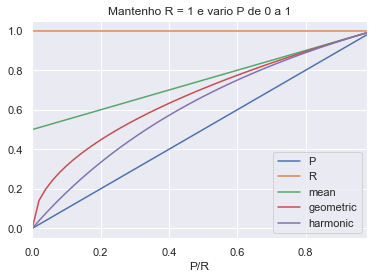

In [33]:
df[['P2','P','R','mean','geometric','harmonic']].plot( x='P2', )
plt.xlabel('P/R')
# plt.yticks([i/10 for i in range(1,11)])
# plt.xticks([i/10 for i in range(1,11)])
plt.title('Mantenho R = 1 e vario P de 0 a 1')
plt.show()

## 3D plot

In [7]:
lista = []
n = 50
for i in range(n): 
    for j in range(n):
        lista=lista +[[0.1+i/n,0.1+j/n]]
df2= pd.DataFrame(lista, columns = ['P','R'])
df2['mean']= (df2.P+df2.R)/2
df2['geometric'] = (df2.P*df2.R)**(1/2)
df2['harmonic'] = (2)/((1/df2.P)+(1/df2.R))

In [8]:
df2.head()

,P,R,mean,geometric,harmonic
0,0.1,0.10,0.10,0.100000,0.100000
1,0.1,0.12,0.11,0.109545,0.109091
2,0.1,0.14,0.12,0.118322,0.116667
3,0.1,0.16,0.13,0.126491,0.123077
4,0.1,0.18,0.14,0.134164,0.128571


In [9]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)



z1 = pd.pivot_table(df2, columns = 'P', index = 'R', values = 'mean')
# z2 = pd.pivot_table(df2, columns = 'P', index = 'R', values = 'geometric')
z3 = pd.pivot_table(df2, columns = 'P', index = 'R', values = 'harmonic')
data = [
    go.Surface(z=z1, colorscale='Blues',showscale=True),
#     go.Surface(z=z2, colorscale= 'Greys', showscale=False, opacity=0.95),
    go.Surface(z=z3, colorscale= 'Greens',showscale=True, opacity=0.95)

]

iplot(data,filename='python-docs/multiple-surfaces')

# Com pesos

## Media Harmonica

In [10]:
n =100

In [11]:
df_w = pd.DataFrame([ [i/n, 1]  for i in range(n)], columns = ['P','R'])

In [12]:
w=0.15

In [13]:
df_w['P2']=df_w['P']

In [14]:
df_w['mean_w']= (df_w.P*w+df_w.R*(1-w))
df_w['geometric_w'] = ((df_w.P**w)*(df_w.R**(1-w)))
df_w['harmonic_w'] = 1/((w/df_w.P)+((1-w)/df_w.R))

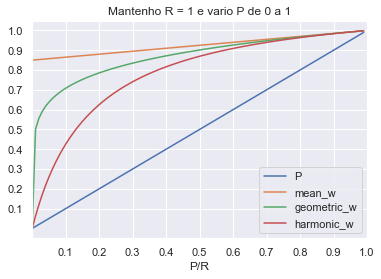

In [15]:
df_w[['P2','P','mean_w','geometric_w','harmonic_w']].plot( x='P2', )
plt.xlabel('P/R')
plt.yticks([i/10 for i in range(1,11)])
plt.xticks([i/10 for i in range(1,11)])
plt.title('Mantenho R = 1 e vario P de 0 a 1')
plt.show()

## 3D plot

In [16]:
w=0.15

In [17]:
lista = []
n = 50
for i in range(n): 
    for j in range(n):
        lista=lista +[[0.1+i/n,0.1+j/n]]
df2_w= pd.DataFrame(lista, columns = ['P','R'])
df2_w['mean_w']= (df2.P*w+df2.R*(1-w))
df2_w['geometric_w'] = ((df2.P**w)*(df2.R**(1-w)))
df2_w['harmonic_w'] = 1/((w/df2.P)+((1-w)/df2.R))

In [18]:
df2_w.head()

,P,R,mean_w,geometric_w,harmonic_w
0,0.1,0.10,0.100,0.100000,0.100000
1,0.1,0.12,0.117,0.116763,0.116505
2,0.1,0.14,0.134,0.133109,0.132075
3,0.1,0.16,0.151,0.149108,0.146789
4,0.1,0.18,0.168,0.164809,0.160714


In [19]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)


# df2_w['P+R']=df2_w['P']+df2_w['R']
z2 = pd.pivot_table(df2_w, columns = 'P', index = 'R', values = 'P+R')
# z1 = pd.pivot_table(df2_w, columns = 'P', index = 'R', values = 'mean_w')
# z2 = pd.pivot_table(df2_w, columns = 'P', index = 'R', values = 'geometric_w')
z3 = pd.pivot_table(df2_w, columns = 'P', index = 'R', values = 'harmonic_w')
data = [
    go.Surface(z=z1, colorscale='Blues',showscale=True),
#     go.Surface(z=z2, colorscale= 'Greys', showscale=False, opacity=0.95),
    go.Surface(z=z3, colorscale= 'Greens',showscale=True, opacity=0.95)

]

iplot(data,filename='python-docs/multiple-surfaces')

KeyError: 'P+R'

In [ ]:
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D  
# # Axes3D import has side effects, it enables using projection='3d' in add_subplot
# import matplotlib.pyplot as plt
# import random



# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# X, Y = np.meshgrid(df2.P, df2.R)


# def mean(x,y):
#     return (x+y)*(1/2)
# zs = np.array(mean(np.ravel(X), np.ravel(Y)))
# Z = zs.reshape(X.shape)
# ax.plot_surface(X, Y, Z, color = 'b')


# def geo_mean(x,y):
#     return (x*y)**(1/2)
# zs = np.array(geo_mean(np.ravel(X), np.ravel(Y)))
# Z = zs.reshape(X.shape)
# ax.plot_surface(X, Y, Z, color = 'y')



# def harmonic(x,y):
#     return (2)/((1/x)+(1/y))
# zs = np.array(harmonic(np.ravel(X), np.ravel(Y)))
# Z = zs.reshape(X.shape)
# ax.plot_surface(X, Y, Z, color = 'r')

# ax.set_xlabel('P Label')
# ax.set_ylabel('R Label')
# ax.set_zlabel('Mean')
# plt.show()